# Data input

In [1]:
# necessary function
import math
import numpy as np

def scale_feature(feature):
  max = float('-inf')
  min = float('inf')
  # first loop find out the max and the min value of feature array
  for i in range(len(feature)):
    if feature[i] > max:
      max = feature[i]
    if feature[i] < min:
      min = feature[i]
  # second loop scale each element of the feature
  for i in range(len(feature)):
    feature[i] = (feature[i] - min)/(max - min)
  return feature

#return length of a vector
# L2 norm
def vect_len(v1):
  l = 0.0
  #print("v1 is {}".format(v1))
  for i in range(len(v1)):
    l += v1[i]*v1[i]
  return(math.sqrt(l))

#returns inner product of two vectors
def vect_inner_prod(v1, v2):
  ip = 0
  for i in range(len(v1)):
    ip += v1[i]*v2[i]
  return ip

#Return the Euclidean distance between two vestors.
def dist_euclidean(v1, v2):
  d = 0
  for i in range(len(v1)):
    d += ((v1[i]-v2[i]) * (v1[i]-v2[i]))
  return d

def dist_manhattan(v1, v2):
  d = 0
  for i in range(len(v1)):
    d += abs(v1[i] - v2[i])
  return d

#Return the cosine similarity between two vectors
def sim_cosine(v1, v2):
  len_v1 = vect_len(v1)
  len_v2 = vect_len(v2)
  inner_v1_v2 = vect_inner_prod(v1, v2)
  cos_v1_v2 = inner_v1_v2/(len_v1 * len_v2)
  return cos_v1_v2

#fixme 
def inf_norm(v1, v2):
  d = -9999999
  for i in range(len(v1)):
    d = max(d, abs(v1[i] - v2[i]))
  return d

In [6]:

#data_file_name = '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Cluster_Analysis/data/College.csv'
#data_file_name = '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Cluster_Analysis/data/Iris_student.csv'
#data_file_name = '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Cluster_Analysis/data/separated_2d.csv'
#data_file_name = '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Cluster_Analysis/data/separated_2d_mixed.csv'
data_file_name = '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Classification/DecTreeAssign1.dat'

data_matrix = []
class_feature = []
with open(data_file_name, 'r') as data_file_ptr:
  if data_file_name == '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Cluster_Analysis/data/College.csv':
    for index, item in enumerate(data_file_ptr):
      item = item.strip()
      item_list = item.split(',')
      if index != 0:
        class_feature.append([item_list[0], item_list[1]])
        item_list = item_list[2:]
        for i in range(len(item_list)):
          item_list[i] = float(item_list[i])
        data_matrix.append(item_list)
  else:
    for index, item in enumerate(data_file_ptr):
      item = item.strip()
      item_list = item.split(',')
      if index != 0:
        class_feature.append(item_list[0])
        item_list = item_list[1:]
        for i in range(len(item_list)):
          item_list[i] = float(item_list[i])
        data_matrix.append(item_list)
        #print(item_list)
#print(class_feature)
print(data_matrix) 

[[17.99, 10.38, 122.8, 1001.0, 0.1184, 0.2776, 0.3001, 0.1471, 0.2419, 0.07871, 1.095, 0.9053, 8.589, 153.4, 0.006399, 0.04904, 0.05373, 0.01587, 0.03003, 0.006193, 25.38, 17.33, 184.6, 2019.0, 0.1622, 0.6656, 0.7119, 0.2654, 0.4601, 0.1189], [20.57, 17.77, 132.9, 1326.0, 0.08474, 0.07864, 0.0869, 0.07017, 0.1812, 0.05667, 0.5435, 0.7339, 3.398, 74.08, 0.005225, 0.01308, 0.0186, 0.0134, 0.01389, 0.003532, 24.99, 23.41, 158.8, 1956.0, 0.1238, 0.1866, 0.2416, 0.186, 0.275, 0.08902], [19.69, 21.25, 130.0, 1203.0, 0.1096, 0.1599, 0.1974, 0.1279, 0.2069, 0.05999, 0.7456, 0.7869, 4.585, 94.03, 0.00615, 0.04006, 0.03832, 0.02058, 0.0225, 0.004571, 23.57, 25.53, 152.5, 1709.0, 0.1444, 0.4245, 0.4504, 0.243, 0.3613, 0.08758], [11.42, 20.38, 77.58, 386.1, 0.1425, 0.2839, 0.2414, 0.1052, 0.2597, 0.09744, 0.4956, 1.156, 3.445, 27.23, 0.00911, 0.07458, 0.05661, 0.01867, 0.05963, 0.009208, 14.91, 26.5, 98.87, 567.7, 0.2098, 0.8663, 0.6869, 0.2575, 0.6638, 0.173], [20.29, 14.34, 135.1, 1297.0, 0.1003

In [7]:
# normalization
is_normalize = True

if is_normalize:
  #normalize each column of the matrix
  for i in range(len(data_matrix[0])): # loop for each column/feature
    feature_vector = [data_matrix[j][i] for j in range(len(data_matrix))]
    for k in range(len(feature_vector)):
      feature_vector[k] = float(feature_vector[k]) #covert to float
    feature_vector = scale_feature(feature_vector)
    for m in range(len(data_matrix)):
      data_matrix[m][i] = feature_vector[m]
print(data_matrix)

[[0.5210374366983767, 0.022658099425092997, 0.5459885287817012, 0.3637327677624602, 0.5937528211609642, 0.7920372983252562, 0.7031396438612932, 0.7311133200795229, 0.6863636363636364, 0.6055181128896379, 0.35614702154626104, 0.12046941301272983, 0.3690335956273854, 0.2738112581668217, 0.15929564537512322, 0.3513984438369334, 0.13568181818181818, 0.30062511839363515, 0.3116451848933416, 0.1830424388154167, 0.6207755247242974, 0.1415245202558635, 0.6683101748095025, 0.4506979944946913, 0.6011358383411478, 0.6192915563058473, 0.5686102236421725, 0.9120274914089348, 0.5984624482554701, 0.4188639643185098], [0.6431444933503716, 0.2725735542779844, 0.6157832907193699, 0.5015906680805938, 0.28987993138936535, 0.18176798969388383, 0.2036082474226804, 0.34875745526838964, 0.3797979797979798, 0.14132266217354678, 0.15643671917436175, 0.08258928571428571, 0.12444046553267682, 0.12565978953974424, 0.11938674915864973, 0.0813230390242437, 0.04696969696969697, 0.2538359537791249, 0.0845387516181685,

# K-mean algorithm

1. Select K points as initial centroids
2. repeat
3. Form K clusters by assigning each point to its closest centroid
  - finding distance between each data points with each centroid
  - assign the data point to the closest centroid
4. Recompute the centroid of each cluster
5. until centroid do not change (or distance is close enough)

In [ ]:
# k-mean

# hyperparameters
K = 3  # user-defined hyperparameter
distance_method = dist_euclidean  # distance method
ini_centroid = "ra"    # initial centroid generation
max_iter = 500   # max number of iteration

"""
allow four different ways of measuring distance
- Euclidean
- One-norm (Manhattan distance) (this should be a trivial change to Euclidean)
- Infinity norm (max)
- Cosine similarity

"""
# for output console analysis
sse_ind = {}
for j in range(K):
  sse_ind[j + 1] = []
all_sse = []
num_iter = 0


centroids = []
new_centroids = []
if ini_centroid == "random": # random assign centroid
  for i in range(K):
    # choose the first k data points as centroid
    centroids.append(data_matrix[i])
else:  # k-mean ++
  for i in range(K):
    if i == 0:
      tmp = np.random.choice(len(data_matrix))
      centroids.append(data_matrix[tmp])
    else:
      prob_vector = []
      tmp_dist = 9999999
      for data in data_matrix:
        tmp_dist = 999999
        for centroid in centroids:
          tmp_dist = min(dist_euclidean(data, centroid), tmp_dist)
        prob_vector.append(tmp_dist**2)
      tmp = np.random.choice(len(data_matrix), 1, prob_vector)
      centroids.append(data_matrix[tmp[0]])


print(centroids)

clusters = {}

for i in range(max_iter):
  # initialize clusters
  for j in range(K):
    clusters[j + 1] = []
  # print("cluster at iteration {} is {}".format(i, clusters))
  # find the distance and assign
  min_dist = 9999999999
  print()
  for data in data_matrix:
    min_dist = 9999999999
    for index, centroid in enumerate(centroids):
      #print("data is {} and centroid is {}".format(data, centroid))
      dist = distance_method(centroid, data)
      #print("distance at {} is {}".format((index+1), dist))
      if dist < min_dist:
        min_dist = dist
        target_centroid = index
    clusters[target_centroid + 1].append(data)
    #print("smallest dist is at {}".format((target_centroid + 1)))
    #print(clusters)
  


  # update the centroids
  # centroid might not be part of the data
  for j in range(K):
    # print(clusters[j+1])
    # compute mean
    if len(clusters[j+1]) == 0:
      new_centroid = centroids[j]
    else:
      new_centroid = np.average(clusters[j+1], axis = 0)
    #print(new_centroid)
    new_centroids.append(new_centroid)
  """
  print(new_centroids)
  for o in range(len(centroids)):
    if np.isnan(new_centroids[o]):
      new_centroids[o] == centroids[o]
  print("after")
  print(new_centroids)
  """
  centroids = np.array(centroids)
  new_centroids = np.array(new_centroids)
  # break if centroid never changes
  threshold = dist_euclidean(centroids, new_centroids)
  
  # calculate SSE for each cluster
  sse = 0
  total_sse = 0
  if np.sum(threshold) == 0:
    print("Here at iteration {}".format(i))
    print("final centroids {}".format(np.array(new_centroids)))
    for key, value in clusters.items():
      print("cluster {} has size {}, value is {}".format(key, len(value), value))
    for index, centroid in enumerate(centroids):
      for data in clusters[index + 1]:
        sse += dist_euclidean(data, centroid)
      print("SSE of cluster {} is {}".format((index +1), sse))
      sse_ind[index + 1].append(sse)
      total_sse += sse
      sse = 0
    print("total SSE is {}".format(total_sse))
    all_sse.append(total_sse)
    num_iter = i
    break
  else:
    print("here at iteration {}".format(i))
    for key, value in clusters.items():
      print("cluster {} has size {}, value is {}".format(key, len(value), value))
    print("old centroids {}".format(centroids))
    print("new centroids {}".format(new_centroids))
    for index, centroid in enumerate(centroids):
      for data in clusters[index + 1]:
        sse += dist_euclidean(data, centroid)
      print("SSE of cluster {} is {}".format((index +1), sse))
      sse_ind[index + 1].append(sse)
      total_sse += sse
      sse = 0
    print("total SSE is {}".format(total_sse))
    all_sse.append(total_sse)
  centroids = new_centroids
  new_centroids = []
  clusters = {}
  
        

[[7473.0, 5372.0, 3013.0, 27.0, 53.0, 15749.0, 3237.0, 5764.0, 3262.0, 750.0, 3300.0, 86.0, 92.0, 16.5, 22.0, 8612.0, 53.0], [5549.0, 3583.0, 853.0, 9.0, 40.0, 5004.0, 475.0, 6550.0, 4176.0, 600.0, 1380.0, 80.0, 90.0, 17.9, 16.0, 6174.0, 65.0], [1109.0, 922.0, 375.0, 24.0, 46.0, 1115.0, 70.0, 13240.0, 3914.0, 600.0, 800.0, 73.0, 85.0, 13.4, 27.0, 9333.0, 73.0]]

here at iteration 0
cluster 1 has size 77, value is [[12809.0, 10308.0, 3761.0, 24.0, 49.0, 22593.0, 7585.0, 7434.0, 4850.0, 700.0, 2100.0, 88.0, 93.0, 18.9, 5.0, 4602.0, 48.0], [7548.0, 6791.0, 3070.0, 25.0, 57.0, 16262.0, 1716.0, 6300.0, 3933.0, 600.0, 1908.0, 85.0, 91.0, 16.7, 18.0, 6642.0, 69.0], [20192.0, 13007.0, 3810.0, 45.0, 80.0, 14971.0, 3113.0, 18420.0, 6810.0, 475.0, 1025.0, 80.0, 81.0, 11.9, 16.0, 16836.0, 72.0], [9251.0, 7333.0, 3076.0, 14.0, 45.0, 13699.0, 1213.0, 7452.0, 3352.0, 600.0, 1700.0, 81.0, 89.0, 21.1, 14.0, 6918.0, 67.0], [7365.0, 5402.0, 4615.0, 48.0, 82.0, 27378.0, 1253.0, 2340.0, 3580.0, 860.0, 1220

# DBSCAN

yes
yes
yes
yes
yes
yes
yes
yes
yes
False
number of clusters is 19


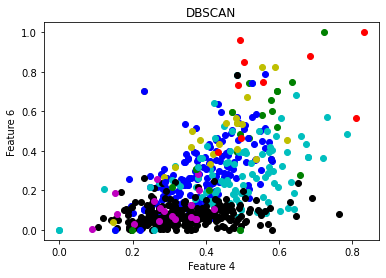

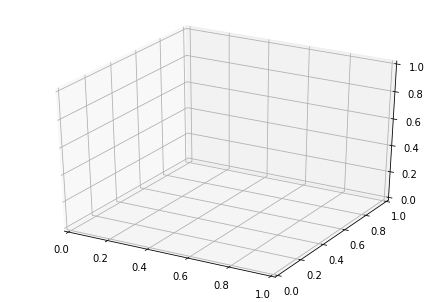

In [30]:
MinPts = 5
Eps = 0.8
counter = 0
#print(data_matrix)
points_classfied = {}
anomaly_data = []
for i in range(len(data_matrix)):
  counter = 0
  for point in data_matrix:
    if dist_euclidean(point, data_matrix[i]) < Eps:
      counter += 1
  #print(counter)
  if counter > MinPts:
    points_classfied[i] = "core"
  elif counter == 1:
    points_classfied[i] = "noise"
    anomaly_data.append(data_matrix[i])
    print("yes")
  else:
    points_classfied[i] = "border"
  #print(points_classfied[i])

copied_list = [data_matrix[k] for k in range(len(data_matrix)) if points_classfied[k] == "core"]
used = [False] * len(copied_list)
clusters = []
print(all(used))
while not all(used): # not empty
  #print(len(copied_list))
  for i in range(len(copied_list)):
    if used[i] == False:
      tmp_holder = copied_list[i]
      used[i] == True
      break
  #print(len(copied_list))
  tmp_cluster = []
  for i in range(len(copied_list)):
    if used[i] == False and dist_euclidean(tmp_holder, copied_list[i]) < Eps:
      tmp_cluster.append(copied_list[i])
      used[i] = True
  tmp_cluster.append(tmp_holder)
  clusters.append(tmp_cluster)
  #print(tmp_cluster)
#print(clusters)
  
import matplotlib.pyplot as plt
# only plot the first 3 dimension for 3D
from matplotlib import pyplot
color = ["g", "b", "c", "k", "y", "m"]
for i in range(len(clusters)):
  for data in clusters[i]:
    if i < len(color):
      plt.scatter(data[4], data[6], color = color[i])
    else:
      plt.scatter(data[4], data[6], color = color[np.random.randint(10) % 6])

import numpy as np
anomaly_data = np.array(anomaly_data)
plt.scatter(anomaly_data[:,4], anomaly_data[:,6], color = 'r')
plt.xlabel("Feature 4")
plt.ylabel("Feature 6")
plt.title("DBSCAN")
print("number of clusters is {}".format(len(clusters)))

from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = Axes3D(fig)
#for i in range(len(clusters)):
 # for data in clusters[i]:
    #plt.scatter(data[0], data[1], data[2])

# SSB

In [ ]:
mean_all = np.average(data_matrix, axis = 0)
SSB = 0
for i in range(len(new_centroids)):
  SSB += dist_euclidean(mean_all, new_centroids[i]) ** 2 * len(clusters[i+1])
print(SSB)
print(total_sse)
print(total_sse + SSB)

14.217808303534488
3.3437327113624944
17.56154101489698


# Output Analysis

Text(0, 0.5, 'SSE')

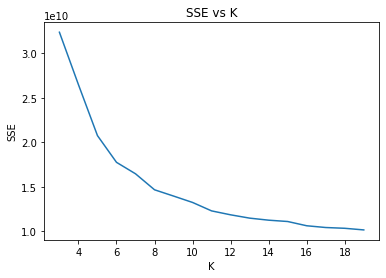

In [ ]:
# SSE versus K
k = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
sse = [32365874599.91604, 26478906204.001755, 20756223382.426033, 17755828424.350147, 16467349834.875107, 14671278001.074966, 13966024133.957739, 13247590061.293709, 12299948937.461998, 11858516089.13569, 11486501385.692978, 11256448013.533152, 11107357697.62862, 10629672588.500463, 10432603441.49749, 10345591383.276966, 10163258309.291815]
plt.plot(k, sse)
plt.title("SSE vs K")
plt.xlabel("K")
plt.ylabel("SSE")

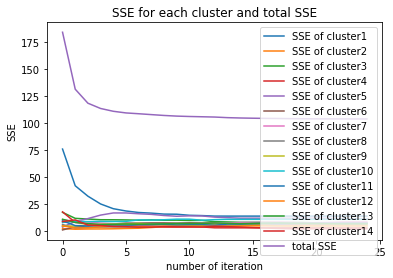

In [ ]:
# SSE versus iteration
import matplotlib.pyplot as plt
import numpy as np
plt.title("SSE for each cluster and total SSE")
plt.xlabel("number of iteration")
plt.ylabel("SSE")
x = np.arange(0, num_iter + 1, 1)
for key, value in sse_ind.items():
  plt.plot(x, value, label = 'SSE of cluster' + str(key))
plt.plot(x, all_sse, label = 'total SSE')
plt.legend()

In [ ]:
a = [True, True]

print(all(a))

True


# Visualizing the plot


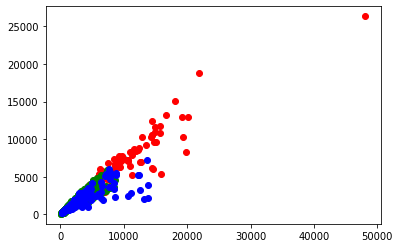

In [ ]:
import matplotlib.pyplot as plt
# only plot the first 3 dimension for 3D
from matplotlib import pyplot
color = ["r", "g", "b", "c", "k", "y"]
for centroid in centroids:
  plt.scatter(centroid[0], centroid[1], marker = "x")

for j in range(K):
  for data in clusters[j+1]:
    plt.scatter(data[0], data[1], color = color[j])



In [ ]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
r = np.corrcoef(x, y)
print(r)
print(x.shape)

[[1.         0.75864029]
 [0.75864029 1.        ]]
(10,)


In [ ]:
# proximity matrix correlation
print
# similarity matrix
sim_matrix = []
for i in range(len(data_matrix)):
  for j in range(i+1,len(data_matrix)):
    eu_dist = dist_euclidean(data_matrix[i],data_matrix[j])
    ideal = 0
    for key, value in clusters.items():
      #print("cluster {} has size {}, value is {}".format(key, len(value), value))
      if data_matrix[i] in value and data_matrix[j] in value:
        ideal = 1
        break
    sim_matrix.append([data_matrix[i], data_matrix[j], eu_dist, ideal])
print(sim_matrix)
sim_matrix = np.array(sim_matrix)
print(np.corrcoef(sim_matrix[:,2].astype(float), sim_matrix[:,3].astype(float)))

[[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], 0.2899999999999997, 0], [[5.1, 3.5, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], 0.25999999999999945, 0], [[5.1, 3.5, 1.4, 0.2], [4.6, 3.1, 1.5, 0.2], 0.41999999999999993, 0], [[5.1, 3.5, 1.4, 0.2], [5.0, 3.6, 1.4, 0.2], 0.01999999999999995, 1], [[5.1, 3.5, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], 0.38000000000000034, 1], [[5.1, 3.5, 1.4, 0.2], [4.6, 3.4, 1.4, 0.3], 0.27, 1], [[5.1, 3.5, 1.4, 0.2], [5.0, 3.4, 1.5, 0.2], 0.029999999999999964, 1], [[5.1, 3.5, 1.4, 0.2], [4.4, 2.9, 1.4, 0.2], 0.8499999999999991, 0], [[5.1, 3.5, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], 0.21999999999999964, 0], [[5.1, 3.5, 1.4, 0.2], [5.4, 3.7, 1.5, 0.2], 0.1400000000000005, 1], [[5.1, 3.5, 1.4, 0.2], [4.8, 3.4, 1.6, 0.2], 0.13999999999999999, 1], [[5.1, 3.5, 1.4, 0.2], [4.8, 3.0, 1.4, 0.1], 0.3499999999999999, 0], [[5.1, 3.5, 1.4, 0.2], [4.3, 3.0, 1.1, 0.1], 0.9899999999999995, 0], [[5.1, 3.5, 1.4, 0.2], [5.8, 4.0, 1.2, 0.2], 0.7800000000000002, 1], [[5.1, 3.5, 1.4, 0.2], [5.7, 4.4, 1.5, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


{'i': array([0.5900000000000001, 1], dtype=object)}
   0    1    2    3    4    5    6    ...  143  144  145  146  147  148  149
0  5.1  4.9  4.7  4.6  5.0  5.4  4.6  ...  6.8  6.7  6.7  6.3  6.5  6.2  5.9
1  3.5  3.0  3.2  3.1  3.6  3.9  3.4  ...  3.2  3.3  3.0  2.5  3.0  3.4  3.0
2  1.4  1.4  1.3  1.5  1.4  1.7  1.4  ...  5.9  5.7  5.2  5.0  5.2  5.4  5.1
3  0.2  0.2  0.2  0.2  0.2  0.4  0.3  ...  2.3  2.5  2.3  1.9  2.0  2.3  1.8

[4 rows x 150 columns]
          0         1         2    ...       147       148       149
0    1.000000  0.995999  0.999974  ...  0.653473  0.633917  0.633158
1    0.995999  1.000000  0.996607  ...  0.708983  0.686257  0.684835
2    0.999974  0.996607  1.000000  ...  0.657556  0.637631  0.636806
3    0.998168  0.997397  0.998333  ...  0.694538  0.677737  0.677225
4    0.999347  0.992233  0.999061  ...  0.634029  0.616536  0.616138
..        ...       ...       ...  ...       ...       ...       ...
145  0.646865  0.705879  0.651305  ...  0.997358  0.9867

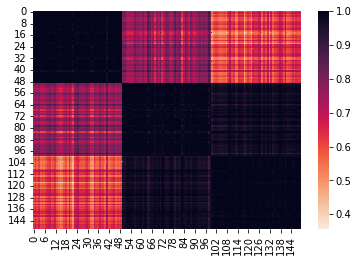

In [ ]:
import matplotlib.pyplot as plt
sim_matrix_plt = sim_matrix[:,3]
 
import seaborn as sns
from scipy import stats
import pandas as pd
#print(stats.pearsonr(sim_matrix[:,2].astype(float), sim_matrix[:,3].astype(float)))

#print(sim_matrix[:,2:])
# 每一个element是dictionary的key,value是proximity
# 创造panda data frame
# use corr()
matrixA = {}
for i in range(len(sim_matrix[:,2:])):
  matrixA['i'] = sim_matrix[i, 2:]

print(matrixA)
data_matrix = np.array(data_matrix)
df = pd.DataFrame(data_matrix.T)
print(df)
cormat = df.corr()
cmap = sns.cm.rocket_r
sns.heatmap(cormat, cmap = cmap)
print(cormat)

IndexError: ignored

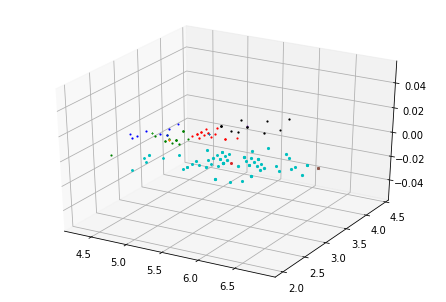

In [ ]:
# only plot the first 3 dimension for 3D
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
fig = pyplot.figure()
ax = Axes3D(fig)
color = ["r", "g", "b", "c", "k"]
for centroid in centroids:
  plt.scatter(centroid[0], centroid[1], centroid[2], marker = "x")

for j in range(K):
  for data in clusters[j+1]:
    plt.scatter(data[0], data[1], data[2], color = color[j])